# Geometrical View of Vectors

## Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

## Vector in 2D Space

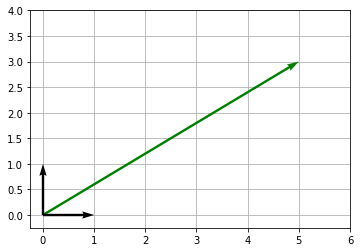

In [26]:
origin=np.array([[0], [0]])
i=np.array([[1], [0]])
j=np.array([[0], [1]])
a=np.array([[5], [3]])

ax=plt.subplot()

ax.quiver(*origin, *a, color='green', units='xy', scale=1)
ax.quiver(*origin, *j, color='black', units='xy', scale=1)
ax.quiver(*origin, *i, color='black', units='xy', scale=1)

ax.set(xlim=[-0.25,6], ylim=[-0.25,4])
ax.set_axisbelow(True)
plt.gca().set_aspect('equal')
plt.grid()

## Construction of vector using basis vectors

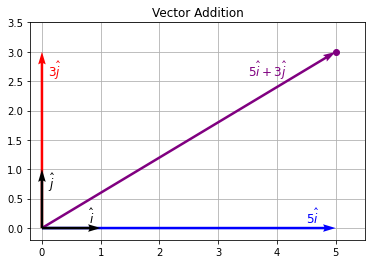

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Creating plot
ax=plt.subplot()

# Defining i-hat and j-hat, basis of the system
v1=np.array([[1], [0]])
v2=np.array([[0], [1]])

# Multiplication of basis vectors by scalars
v3=5*v1
v4=3*v2

# Sum of vectors
v5=v3+v4

# Defining Origin
origin=[[0], [0]]

# Plotting Vectors
ax.quiver(*origin, *v3, color='blue', units='xy', scale=1)
ax.quiver(*origin, *v4, color='red', units='xy', scale=1)
ax.quiver(*origin, *v5, color='purple', units='xy', scale=1)
ax.quiver(*origin, *v1, color='black', units='xy', scale=1)
ax.quiver(*origin, *v2, color='black', units='xy', scale=1)

# Plotting Target
ax.scatter(5,3, color='purple')

# Plotting vector names and operations
plt.text(0.8, 0.1, r'$\hat{i}$', fontsize=12)
plt.text(0.1, 0.7, r'$\hat{j}$', fontsize=12)
plt.text(4.5, 0.1, r'$5\hat{i}$', fontsize=12, color='blue')
plt.text(0.1, 2.6, r'$3\hat{j}$', fontsize=12, color='red')
plt.text(3.5, 2.6, r'$5\hat{i}+3\hat{j}$', fontsize=12, color='purple')

# Plot configs
plt.title('Vector Addition')
plt.xlim(-0.2, 5.5)
plt.ylim(-0.2, 3.5)
plt.grid()
ax.set_axisbelow(True)
plt.gca().set_aspect('equal')
# plt.savefig('VectorAddition.png', transparent='True', dpi=200)

# Interactive Plot for Angle Offset Coordinate System

## Plot Function

In [28]:
# Class for the Vectors
class Vectors(object):
    
    def __init__(self, array=None, x=None, y=None):
        
        if x == None and y == None:
            self.array=array
            self.i=array[0][0]
            self.j=array[1][0]
        else:
            self.array=np.array([[x], [y]])
            self.i=x
            self.j=y

In [27]:
# Basis Vectors for the original system
ux=Vectors(None, 1, 0)
uy=Vectors(None, 0, 1)

# Create Plot
def update_plot(vector_on_vector, target_x, target_y, offset_angle):
    
    ang=np.radians(-offset_angle) # minus sign to change the direction accordingly with trigonometry 
    
    # Definition of the new basis vectors (with angle offset):
    v_hat = Vectors(np.cos(-ang)*ux.array + np.sin(-ang)*uy.array)
    w_hat = Vectors(np.sin(ang)*ux.array + np.cos(ang)*uy.array)
    
    # Old Geometric based solution to finding new scalars
    # remain_angle=np.radians(90-angle)-np.arctan(target[1][0]/target[0][0])
    # hypotenuse=np.sqrt(target[1][0]**2+target[0][0]**2)
    # a=np.cos(remain_angle)*hypotenuse
    # b=np.sin(remain_angle)*hypotenuse

    #Algebraic Solution to finding the scalars of the basis vectors
    if np.sin(-ang) == 0:
        a=target_y
    else:
        a=(target_x+target_y*(-v_hat.i/v_hat.j))/(w_hat.i-w_hat.j*v_hat.i/v_hat.j)
        
    if abs(np.sin(-ang)) == 1:
        b=target_y*np.sin(-ang)
    else:
        b=(target_x-a*w_hat.i)/v_hat.i

    # Multiplication of basis vectors of this current system by scalars
    v1= Vectors(b*v_hat.array)
    v2= Vectors(a*w_hat.array)

    # Sum of vectors
    v3= Vectors(v1.array+v2.array)

    # Defining Origin
    origin=[[0], [0]]
    
    # Creating plot
    ax=plt.subplot()

    # Plotting Vectors
    ax.quiver(*origin, *v1.array, color='blue', units='xy', scale=1)
    
    if vector_on_vector:
        ax.quiver(*v1.array, *v2.array, color='red', units='xy', scale=1)
    else:
        ax.quiver(*origin, *v2.array, color='red', units='xy', scale=1)
        # Plotting line guides for orthogonal vectors
        ax.plot([v1.i, target_x], [v1.j, target_y], color='gray', linestyle='--', linewidth=1)
        ax.plot([v2.i, target_x], [v2.j, target_y], color='gray', linestyle='--', linewidth=1)

    
    ax.quiver(*origin, *v3.array, color='purple', units='xy', scale=1)
    ax.quiver(*origin, *w_hat.array, color='black', units='xy', scale=1)
    ax.quiver(*origin, *v_hat.array, color='black', units='xy', scale=1)

    # Plotting Target
    ax.scatter(target_x, target_y, color='purple')

    # Plot configs
    plt.title('Vector Addition, Coordinate system offset by $'+str(offset_angle)+'^\circ$')
    plt.xlim(-8, 8)
    plt.ylim(-5, 5)
    ax.set_axisbelow(True)
    plt.grid()
    plt.gca().set_aspect('equal')
    # plt.axis('equal');  -> Don't know why this does not work
    plt.show()
    # plt.savefig('VectorAddition2.png', transparent='True', dpi=200)

# Slider Widget Setup
vector_on_vector=widgets.Checkbox(value=False, indent=False, description='Vector $\hat w$ at the base of $\hat v$')
target_x=widgets.FloatSlider(min=-5, max=5, step=0.5, value=5, description='Target on x:')
target_y=widgets.FloatSlider(min=-5, max=5, step=0.5, value=2, description='Target on y:')
offset_angle=widgets.IntSlider(min=-180, max=180, step=10, value=0, description='Offset angle:')

# Interactive Function between graph plot function and the widgets
interactive(update_plot, vector_on_vector=vector_on_vector, target_x=target_x, target_y=target_y, offset_angle=offset_angle)

interactive(children=(Checkbox(value=False, description='Vector $\\hat w$ at the base of $\\hat v$', indent=Fa…

## Linear Transformations

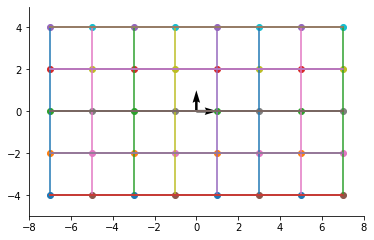

In [487]:
origin=np.array([[0], [0]])
i_hat=Vectors(x=1, y=0)
j_hat=Vectors(x=0, y=1)
ax=plt.subplot()

ax.quiver(*origin, *i_hat.array, scale=1, units='xy')
ax.quiver(*origin, *j_hat.array, scale=1, units='xy')

x=np.arange(-7, 8, 2)
y=np.arange(-4, 5, 2)
max_x=max(x)
min_x=min(x)
max_y=max(y)
min_y=min(y)

for i in x:
    ax.plot([i, i], [min_y, max_y])
    for j in y:
        ax.plot([min_x, max_x], [j, j])
        ax.scatter(i, j)

# plt.title('Vector Addition, Coordinate system offset by $'+str(offset_angle)+'^\circ$')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim([-8, 8])
plt.ylim([-5, 5])
ax.set_axisbelow(True)
# plt.grid()
plt.gca().set_aspect('equal')
# plt.savefig('', dpi=250)

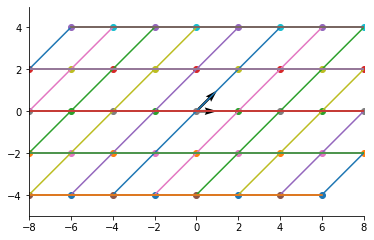

In [520]:
origin=np.array([[0], [0]])
i_hat=Vectors(x=1, y=0)
j_hat=Vectors(x=0, y=1)
ax=plt.subplot()

trans_matrix=np.array([[1, 0], [1, 1]]).transpose()

ax.quiver(*origin, *np.matmul(trans_matrix, i_hat.array), scale=1, units='xy')
ax.quiver(*origin, *np.matmul(trans_matrix, j_hat.array), scale=1, units='xy')

x=np.arange(-10, 11, 2)
y=np.arange(-4, 5, 2)
max_x=max(x)
min_x=min(x)
max_y=max(y)
min_y=min(y)

for i in x:
    x_i, y_i=np.matmul(trans_matrix, np.array([[i, i], [min_y, max_y]]))
    ax.plot(x_i, y_i)
    for j in y:
        x_j, y_j=np.matmul(trans_matrix, np.array([[min_x, max_x], [j, j]]))
        ax.plot(x_j, y_j)
        
        i_ij, j_ij = np.matmul(trans_matrix, np.array([[i],[j]]))
        ax.scatter(i_ij, j_ij)

# plt.title('Vector Addition, Coordinate system offset by $'+str(offset_angle)+'^\circ$')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim([-8, 8])
plt.ylim([-5, 5])
ax.set_axisbelow(True)
# plt.grid()
plt.gca().set_aspect('equal')
# plt.savefig('', dpi=250)